## Exploratory Data Analysis 

#### Roles TO Explore:


In [1]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
# loading Data
dataset= load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']= df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter For Data Scientist Data
#df_DS= df[df["job_title_short"]=="Data Scientist"].copy()

### Filter For Pakistan Data Scientist Roles

In [2]:
df_DS_Pak=df[(df["job_country"]== 'Pakistan')  & (df["job_title_short"]== "Data Scientist")]

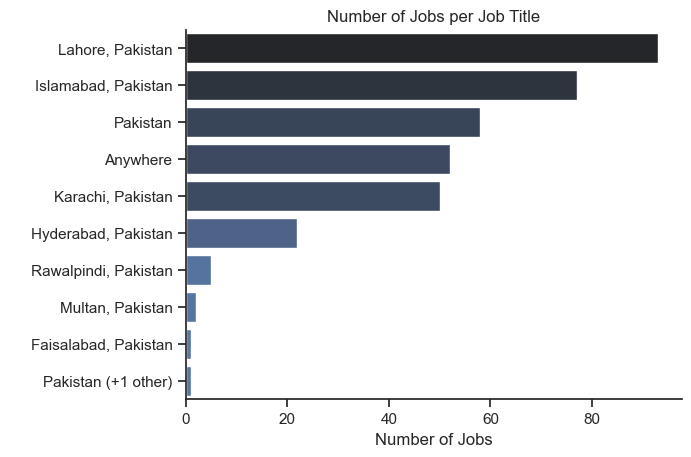

In [15]:
df_plot =df_DS_Pak['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y="job_location", hue='count', palette='dark:b_r', legend=False)

sns.despine()
plt.title("Number of Jobs per Job Title")
plt.xlabel('Number of Jobs')
plt.ylabel(" ")
plt.show()

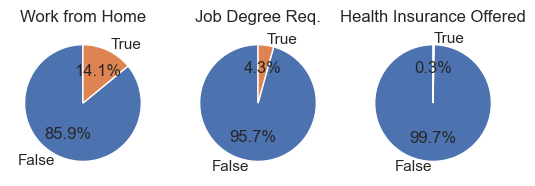

In [16]:
df[["job_work_from_home", "job_no_degree_mention","job_health_insurance"]]

fig,ax =plt.subplots(1,3)

dict_column={
    'job_work_from_home':'Work from Home',
    "job_no_degree_mention":'Job Degree Req.',
    "job_health_insurance": 'Health Insurance Offered'
}

for i , (column,title) in enumerate(dict_column.items()):
    ax[i].pie(df_DS_Pak[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=["False","True"])  
    ax[i].set_title(title)


plt.show()



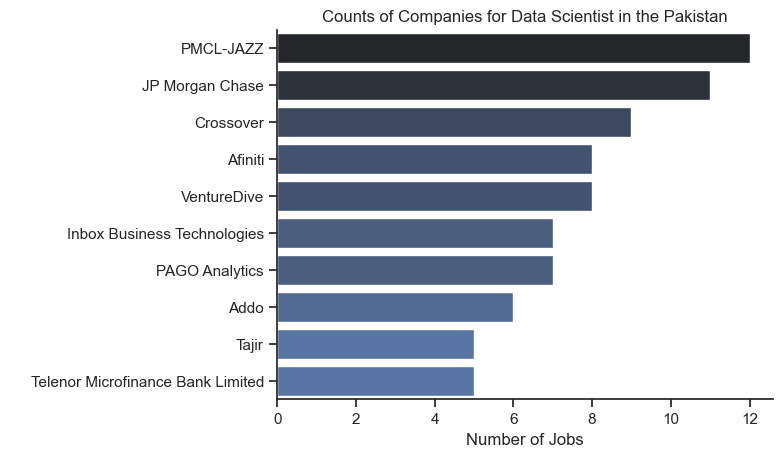

In [18]:
df_plot =df_DS_Pak['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y="company_name", hue='count', palette='dark:b_r', legend=False)

sns.despine()
plt.title("Counts of Companies for Data Scientist in the Pakistan")
plt.xlabel('Number of Jobs')
plt.ylabel(" ")
plt.show()